In [1]:
def energ_estados(N, h, K, eps):
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)

    # Matriz S_z
    S_z = np.diag(Ms)

    def s_mas(m):
        return np.sqrt(S*(S+1)-m*(m+1))

    S_mas = np.zeros((2*S+1, 2*S+1))
    s_mas_vector= s_mas(np.arange(S-1, -S - 1, -1))

    for i in range(len(s_mas_vector)):
        S_mas[i, i + 1] = s_mas_vector[i]
    #Matriz S_- -------------    

    def s_menos(m):
        return np.sqrt(S*(S+1)-m*(m-1))

    S_menos = np.zeros((2*S+1, 2*S+1))
    s_menos_vector= s_menos(np.arange(S, -S, -1))
    for i in range(len(s_menos_vector)):
        S_menos[i+1, i] = s_menos_vector[i]
    #Matriz S_x
    S_x=1/2 * (S_mas + S_menos)

    # Hamiltoniano
    J = 1
    H = -(4 * J) / N * np.diag(Ms**2) - 2 * h * S_x + eps * S_z -(16*K)/(N**3)*np.diag(Ms*Ms*Ms*Ms)

    # Diagonalización
    autoenergias, autovectores = np.linalg.eigh(H)
    return autoenergias, autovectores

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal
import time

#Funciones utilizadas------------------------------------

#Diagonalización tridiagonales
def diagonalizar_tridiagonal_simetrica(diagonal_principal, diagonal_superior):
    # Calcular autovalores y autovectores
    autovalores, autovectores = eigh_tridiagonal(diagonal_principal, diagonal_superior, eigvals_only=False)
    return autovalores,autovectores

#Medir tiempo
start_time = time.time()
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

El tiempo de ejecución fue: 0.000043 segundos


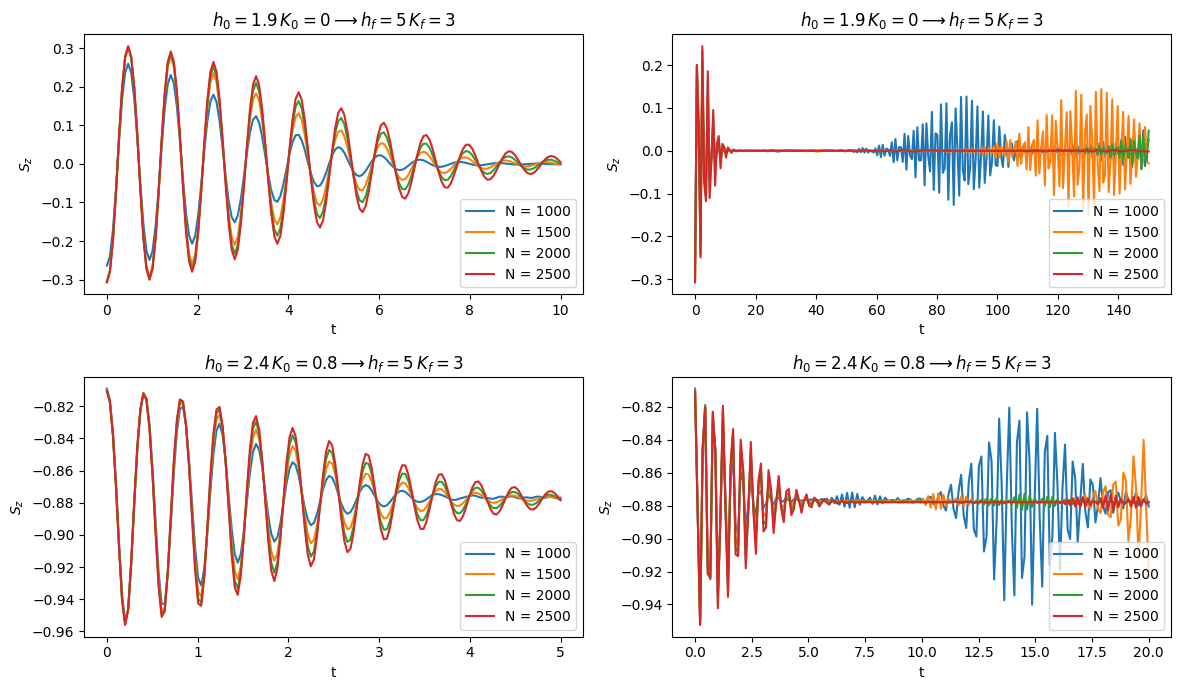

El tiempo de ejecución fue: 2779.000766 segundos


In [46]:
start_time = time.time()
def evolution_time(h0, hf, K0, Kf, eps0, eps1, t0, tf, p, N):
    energ1, auto1 = energ_estados(N, h0, K0, eps0)
    energ2, auto2 = energ_estados(N, hf, Kf, eps1)

    # Cambio de base
    U = auto2.T @ auto1

    # Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c

    # Precálculos
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
    sz_matrix = np.tensordot(auto2.T, (Ms[:, None] * auto2), axes=([1], [0]))

    # Cálculo de S_z en función del tiempo
    energy_diff = energ2[:, None] - energ2[None, :]
    d_d_conj = np.outer(np.conjugate(d[:, 0]), d[:, 0])
    tp = np.linspace(t0, tf, p)

    S_zm = np.array([
        np.sum(sz_matrix * np.exp(-1j * energy_diff * t) * d_d_conj).real / (N / 2)
        for t in tp
    ])

    return tp, S_zm


import matplotlib.pyplot as plt

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# === SUBPLOT [0, 0] ===
ax = axs[0, 0]
Ns = [1000,1500,2000,2500] #1000,1500,2000,2500
for N in Ns:
    tp, Sz = evolution_time(1.9, 5, 0, 3, 1e-6, 0, 0, 10, 150, N)
    ax.plot(tp, Sz, label=f"N = {N}")
ax.set_xlabel("t")
ax.set_ylabel(r"$S_{z}$")
ax.set_title(r"$h_0 =1.9 \, K_0 =0 \longrightarrow  h_f =5 \, K_f =3$")
ax.legend(loc='lower right')

# === SUBPLOT [0, 1] ===
ax = axs[0, 1]
Ns = [1000,1500,2000,2500]
for N in Ns:
    tp, Sz = evolution_time(1.9, 5, 0, 3, 1e-6, 0, 0, 150, 250, N)
    ax.plot(tp, Sz, label=f"N = {N}")
ax.set_xlabel("t")
ax.set_ylabel(r"$S_{z}$")
ax.set_title(r"$h_0 =1.9 \, K_0 =0 \longrightarrow  h_f =5 \, K_f =3$")
ax.legend(loc='lower right')

# === SUBPLOT [1, 0] ===
ax = axs[1, 0]
Ns = [1000,1500,2000,2500]
for N in Ns:
    tp, Sz = evolution_time(2.4, 5, 0.8, 3, 1e-6, 0, 0, 5, 150, N)
    ax.plot(tp, Sz, label=f"N = {N}")
ax.set_xlabel("t")
ax.set_ylabel(r"$S_{z}$")
ax.set_title(r"$h_0 =2.4 \, K_0 =0.8 \longrightarrow  h_f =5 \, K_f =3$")
ax.legend(loc='lower right')

# === SUBPLOT [1, 1] ===
ax = axs[1, 1]
Ns = [1000,1500,2000,2500]
for N in Ns:
    tp, Sz = evolution_time(2.4, 5, 0.8, 3, 1e-6, 0, 0, 20, 180, N)
    ax.plot(tp, Sz, label=f"N = {N}")
ax.set_xlabel("t")
ax.set_ylabel(r"$S_{z}$")
ax.set_title(r"$h_0 =2.4 \, K_0 =0.8 \longrightarrow  h_f =5 \, K_f =3$")
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()
end_time = time.time()
execution_time = end_time - start_time
print(f"El tiempo de ejecución fue: {execution_time:.6f} segundos")

In [12]:
import mpmath
def f(q):
    N = 1500
    J = N / 2
    h = 5
    K = 3 * (N / 2) ** 3
    p=0
    return 2*q*(J*N**2*(p**2 + 2*q**2 - 4) + 2*K*q**2*(-p**2 - 2*q**2 + 4)*(p**2 + q**2 - 4) + N**3*h)/N**3

q_0,NN,eps=biseccion(f,-0.65,-0.5,10**-20,20000)
print(f"Uno de los dos puntos de silla se sitúa en [0, {q_0} ] con precisión {eps} en {NN} iteraciones")
print(f"La energía en la que se sitúan las curvas de nivel que se cruzan es en torno a {float(H(0,q_0)):.5f}")
#q_0 = mpmath.mpf(q_0)


#Primero obtenemos el punto [p,q] que tiene la misma energía que la trayectoria que pasa por el punto de silla pero que se sitúa en el extremo
#izquierdo (magnetización negativa)
def f(q):
    N = 1500
    J = N / 2
    h = 5
    K = 3 * (N / 2) ** 3
    p=0
    return -J * q ** 2 * (-p ** 2 - q ** 2 + 4) / N - K * q ** 4 * (-p ** 2 - q ** 2 + 4) ** 2 / N ** 3 - 2 * h * (-p ** 2 / 2 - q ** 2 / 2 + 1) -float(H(0,q_0))

def biseccion(f,x1,x2,eps,N_max):
    if np.sign(f(x1))!=np.sign(f(x2)):
        N=0
        while abs(x1-x2)>eps and N<N_max:
            N+=1
            xp=0.5*(x1+x2)
            if np.sign(f(xp))==np.sign(f(x1)):
                x1=xp
            else:
                x2=xp
        return xp,N,abs(x1-x2)
    else:
        print("No existe raiz o el intervalo es otro")
        return

float(H(0,q_00))

q_00,NN2,eps2=biseccion(f,-1.5,-0.7,10**-16,20000)
print(f"Uno de los dos puntos de silla se sitúa en [0, {q_00} ] con precisión {eps2} en {NN2} iteraciones")

Uno de los dos puntos de silla se sitúa en [0, -0.6227732344377408 ] con precisión 1.1102230246251565e-16 en 20000 iteraciones
La energía en la que se sitúan las curvas de nivel que se cruzan es en torno a -9.49726
Uno de los dos puntos de silla se sitúa en [0, -1.2564317443131143 ] con precisión 2.220446049250313e-16 en 20000 iteraciones


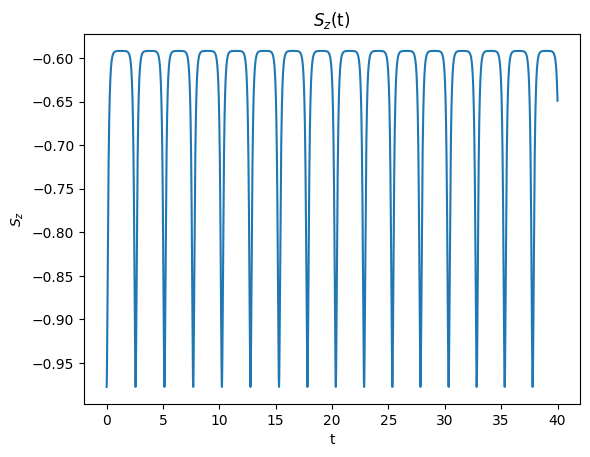

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

# Establecer la precisión deseada (por ejemplo, 50 cifras decimales)
n = 170 # número de cifras significativas
mp.dps = n  # establecer la precisión
# Función H usando mpmath para precisión arbitraria
def H(p, q):
    N = 1500
    J = N / 2
    h = 5
    K = 3 * (N / 2) ** 3
    p = mp.mpf(p)  # convertir p y q a tipos de mpmath
    q = mp.mpf(q)
    return -J * q ** 2 * (-p ** 2 - q ** 2 + 4) / N - K * q ** 4 * (-p ** 2 - q ** 2 + 4) ** 2 / N ** 3 - 2 * h * (-p ** 2 / 2 - q ** 2 / 2 + 1)
# Función S_z usando mpmath para precisión arbitraria
def S_z(p, q):
    p = mp.mpf(p)
    q = mp.mpf(q)
    return q * mp.sqrt(4 - q ** 2 - p ** 2) / 2

# Función de evolución temporal usando mpmath
def f(r, t):
    N = 1500
    J = N / 2
    h = 5
    K = 3 * (N / 2) ** 3
    p = r[0]
    q = r[1]
    fp = -(2 * q * (J * N ** 2 * (p ** 2 + 2 * q ** 2 - 4) + 2 * K * q ** 2 * (-p ** 2 - 2 * q ** 2 + 4) * (p ** 2 + q ** 2 - 4) + N ** 3 * h) / N ** 3)
    fq = 2 * p * (J * N ** 2 * q ** 2 - 2 * K * q ** 4 * (p ** 2 + q ** 2 - 4) + N ** 3 * h) / N ** 3
    return np.array([fp, fq], dtype=object)

# Condiciones iniciales
# un valor inicial de ejemplo
a = 0  # punto inicial
b = 40  # punto final
Np = 50000  # número de puntos
hp = (b - a) / Np  # tamaño del paso
tp = np.linspace(a, b, Np)  # inicializamos el tiempo
pp = []
qp = []
r = np.array([0, q_00], dtype=object)  # condiciones iniciales

# Resolver la ecuación diferencial
for t in tp:
    pp.append(float(r[0]))  # almacenar valores de p
    qp.append(float(r[1]))  # almacenar valores de q
    k1 = hp * f(r, t)
    k2 = hp * f(r + 0.5 * k1, t + 0.5 * hp)
    k3 = hp * f(r + 0.5 * k2, t + 0.5 * hp)
    k4 = hp * f(r + k3, t + hp)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Convertir pp y qp a mpmath antes de pasarlos a S_z
mp_pp = [mp.mpf(val) for val in pp]
mp_qp = [mp.mpf(val) for val in qp]

# Graficar S_z(t)
plt.plot(tp, [float(S_z(p, q)) for p, q in zip(mp_pp, mp_qp)])  # Convertir a float para graficar
plt.title("$S_{z}$(t)")
plt.xlabel("t")
plt.ylabel("$S_{z}$")
plt.show()

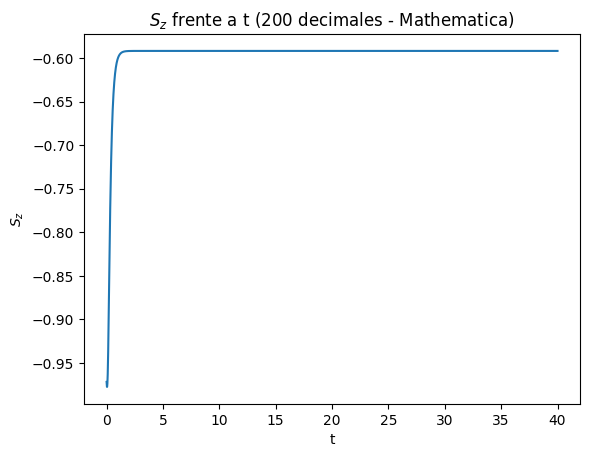

In [17]:
archivo = "critico2.txt"  # Reemplaza con la ruta de tu archivo
datos = np.loadtxt(archivo)

def S_z(q):
    p=0
    return q * np.sqrt(4 - q ** 2 - p ** 2) / 2
    
# Separar las columnas en vectores distintos
t2, q2, p2, dist2 = datos.T  # Transpone para obtener columnas como vectores

plt.plot(t2,-S_z(q2))
plt.title("$S_{z}$ frente a t (200 decimales - Mathematica)")
plt.xlabel("t")
plt.ylabel("$S_{z}$")
plt.show()

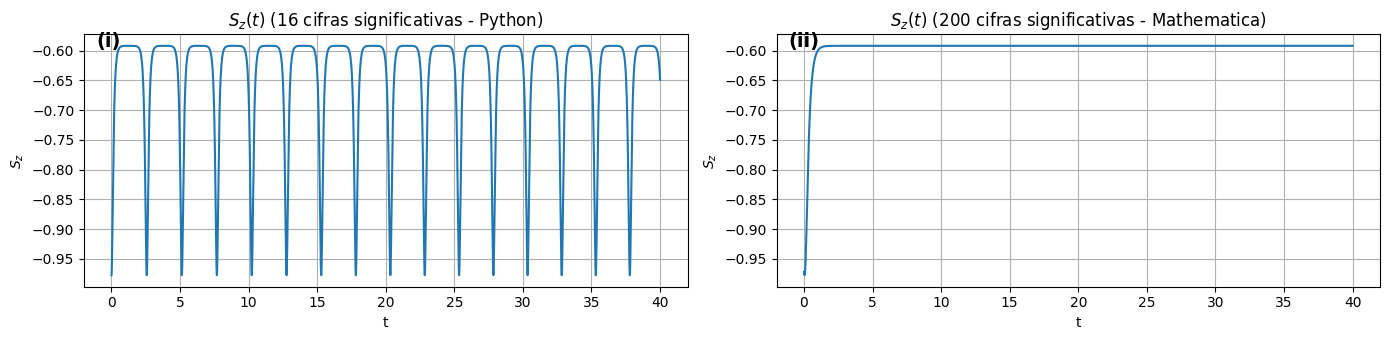

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp

# Establecer la precisión deseada (por ejemplo, 170 cifras decimales)
n = 170
mp.dps = n

# Función H
def H(p, q):
    N = 1500
    J = N / 2
    h = 5
    K = 3 * (N / 2) ** 3
    p = mp.mpf(p)
    q = mp.mpf(q)
    return -J * q ** 2 * (-p ** 2 - q ** 2 + 4) / N - K * q ** 4 * (-p ** 2 - q ** 2 + 4) ** 2 / N ** 3 - 2 * h * (-p ** 2 / 2 - q ** 2 / 2 + 1)

# Función S_z con mpmath
def S_z_mpmath(p, q):
    p = mp.mpf(p)
    q = mp.mpf(q)
    return q * mp.sqrt(4 - q ** 2 - p ** 2) / 2

# Función de evolución temporal
def f(r, t):
    N = 1500
    J = N / 2
    h = 5
    K = 3 * (N / 2) ** 3
    p, q = r
    fp = -(2 * q * (J * N ** 2 * (p ** 2 + 2 * q ** 2 - 4) + 2 * K * q ** 2 * (-p ** 2 - 2 * q ** 2 + 4) * (p ** 2 + q ** 2 - 4) + N ** 3 * h) / N ** 3)
    fq = 2 * p * (J * N ** 2 * q ** 2 - 2 * K * q ** 4 * (p ** 2 + q ** 2 - 4) + N ** 3 * h) / N ** 3
    return np.array([fp, fq], dtype=object)

# Condiciones iniciales para mpmath
a, b = 0, 40
Np = 50000
hp = (b - a) / Np
tp = np.linspace(a, b, Np)
r = np.array([0, q_00], dtype=object)

pp, qp = [], []

for t in tp:
    pp.append(float(r[0]))
    qp.append(float(r[1]))
    k1 = hp * f(r, t)
    k2 = hp * f(r + 0.5 * k1, t + 0.5 * hp)
    k3 = hp * f(r + 0.5 * k2, t + 0.5 * hp)
    k4 = hp * f(r + k3, t + hp)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

mp_pp = [mp.mpf(val) for val in pp]
mp_qp = [mp.mpf(val) for val in qp]
sz_mpmath = [float(S_z_mpmath(p, q)) for p, q in zip(mp_pp, mp_qp)]

# --- Segunda gráfica: cargar datos de archivo ---
archivo = "critico2.txt"
datos = np.loadtxt(archivo)
t2, q2, p2, dist2 = datos.T

def S_z_numpy(q):
    p = 0
    return q * np.sqrt(4 - q ** 2 - p ** 2) / 2

sz_mathematica = -S_z_numpy(q2)

# --- Dibujar ambas gráficas una al lado de la otra ---
fig, axs = plt.subplots(1, 2, figsize=(14, 3.5))

axs[0].plot(tp, sz_mpmath)
axs[0].set_title("$S_{z}(t)$ (16 cifras significativas - Python)")
axs[0].set_xlabel("t")
axs[0].set_ylabel("$S_{z}$")
axs[0].grid()

axs[1].plot(t2, sz_mathematica)
axs[1].set_title("$S_{z}(t)$ (200 cifras significativas - Mathematica)")
axs[1].set_xlabel("t")
axs[1].set_ylabel("$S_{z}$")
axs[1].grid()

axs[0].text(0.02, 0.95, "(i)", transform=axs[0].transAxes,
            fontsize=14, fontweight='bold')
axs[1].text(0.02, 0.95, "(ii)", transform=axs[1].transAxes,
            fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


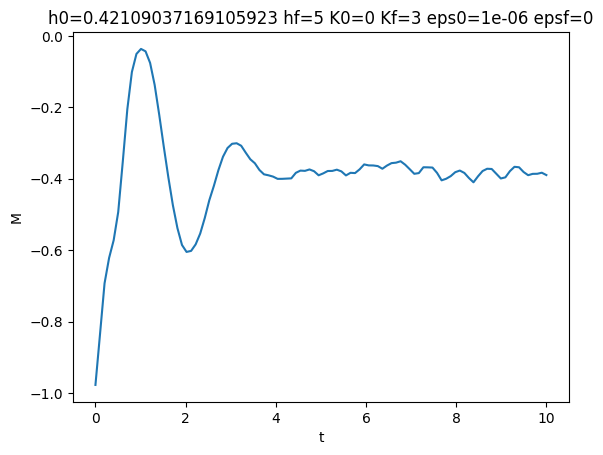

In [25]:
def evolution_time(h0, hf,K0, Kf, eps0, eps1, t0, tf, p, N):
    energ1, auto1 = energ_estados(N, h0, K0, eps0)
    energ2, auto2 = energ_estados(N, hf, Kf, eps1)

    # Cambio de base
    U = auto2.T @ auto1

    # Estado inicial
    c = np.zeros((N + 1, 1))
    c[0] = 1
    d = U @ c

    # Precalculos
    s = 0.5
    S = int(N * s)
    Ms = np.arange(S, -S - 1, -1)
    sz_matrix = np.tensordot(auto2.T, (Ms[:, None] * auto2), axes=([1], [0]))

    # Cálculo de S_z en función del tiempo
    energy_diff = energ2[:, None] - energ2[None, :]
    d_d_conj = np.outer(np.conjugate(d[:, 0]), d[:, 0])

    tp = np.linspace(t0, tf, p)
    S_zm = [
        np.sum(sz_matrix * np.exp(-1j * energy_diff * t) * d_d_conj).real / (N / 2)
        for t in tp
    ]

    plt.plot(tp, S_zm)
    plt.xlabel("t")
    plt.ylabel("M")
    plt.title(f"h0={h0} hf={hf} K0={K0} Kf={Kf} eps0={eps0} epsf={eps1}")
    plt.show()


evolution_time(0.42109037169105923, 5,0,3,1e-6, 0, 0, 10, 100, 1500)

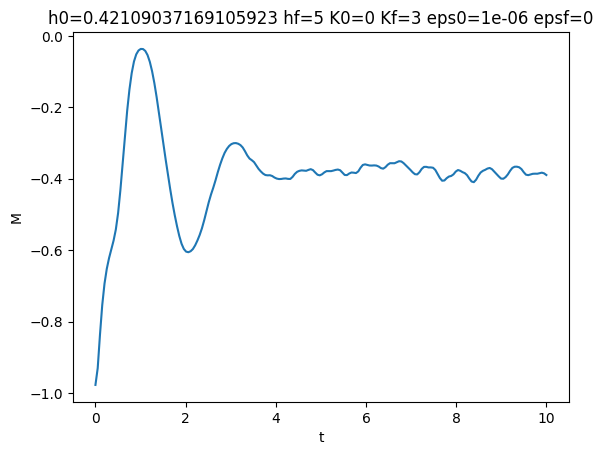

In [26]:
evolution_time(0.42109037169105923, 5,0,3,1e-6, 0, 0, 10, 200, 1500)

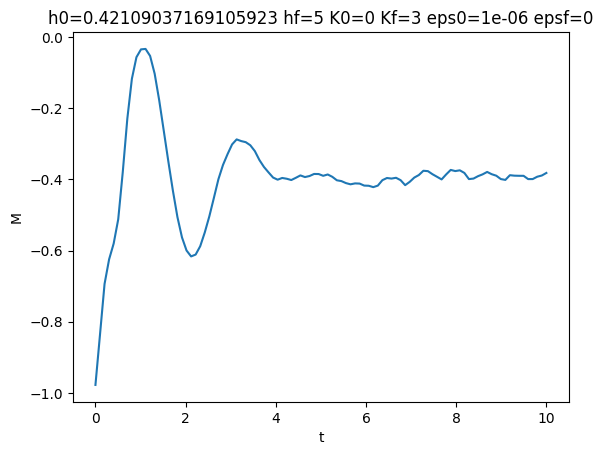

In [27]:
evolution_time(0.42109037169105923, 5,0,3,1e-6, 0, 0, 10, 100, 2000)

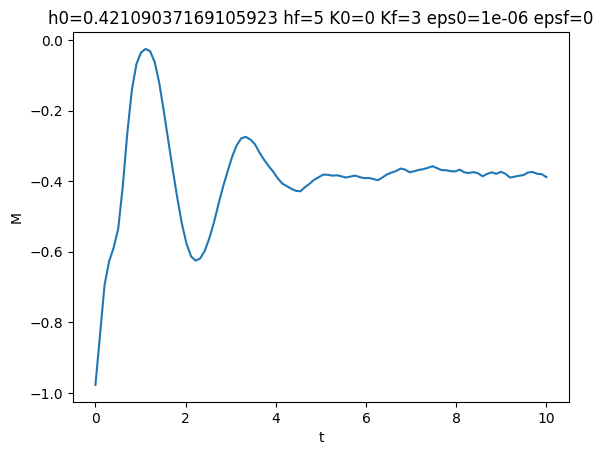

In [28]:
evolution_time(0.42109037169105923, 5,0,3,1e-6, 0, 0, 10, 100, 3000)